# FashionMNIST Data Wrangling and Exploration
The purpose of this notebook is to adequately understand, describe, and explore the fmnist data set that will be used in this project.

In [1]:
import os
while os.path.basename(os.getcwd()) != 'Synthetic_Data_GAN_Capstone':
    os.chdir('..')
from utils.data_loading import load_raw_dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torchvision
import torchvision.utils as vutils
%matplotlib inline

Below is a helper function that we will use to visualize images throughout this notebook:

In [2]:
def show_grid(img):
    im = vutils.make_grid(img)
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Training Images")
    plt.imshow(np.transpose(im.numpy(), (1, 2, 0)))
    plt.show()

### Importing data
Note that I have written a helper function to load in the desired data set. If you have not already downloaded
the data sets to the appropriate directory, this can be done simply by running the following code:

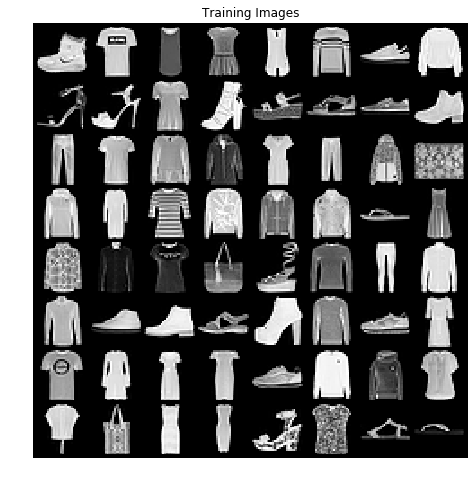

In [3]:
fmnist = load_raw_dataset('FashionMNIST')
images = fmnist[0].data[:64].view(-1, 1, 28, 28).float()
images = images / 255
show_grid(images)

### Inspecting the data

In [4]:
print("Train set is of length:",len(fmnist[0]))
print("Test set is of length:",len(fmnist[1]))
print("Each image is of size:",np.array(fmnist[0][0][0]).shape)

Train set is of length: 60000
Test set is of length: 10000
Each image is of size: (28, 28)


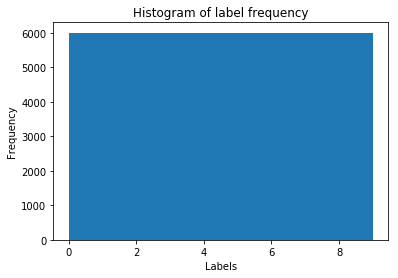

In [5]:
plt.hist(fmnist[0].targets.numpy())
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Histogram of label frequency')
plt.show()

These labels are perfectly balanced.

### Data Augmentation
Refer to the MNIST Data Wrangling and Exploration notebook for details, but we are applying similar transformation techniques to perform data augmentation. Note that due to the nature of the labels, we can be a bit more liberal with how we apply the transformations. For example, if someone flips a 7 upside down, it may no longer look like a 7. However, if we flip a dress or boot upside down, a human would still be able to easily recognize that it is an image of a dress or boot. We want our trained model to be able to draw the same conclusions.

In [6]:
import torchvision.transforms as t
labels = fmnist[0].targets[:64]
def trnsfm_batch(img, labels):
    PIL = torchvision.transforms.ToPILImage()
    TNSR = torchvision.transforms.ToTensor()
    crop_trnsfm = t.RandomResizedCrop(28, scale = (0.85, 1.0), ratio=(0.75, 1.3333))
    affine_trnsfm = t.RandomAffine((-15, 15))
    vert_trnsfm = t.RandomVerticalFlip(p=0.5)
    hor_trnsfm = t.RandomHorizontalFlip(p=0.5)
    final_trnsfm = t.Compose([PIL, crop_trnsfm, affine_trnsfm, vert_trnsfm, hor_trnsfm, TNSR])
    out = torch.empty_like(img)
    for i in range(64):
        tmp = img[i].view(28, 28)
        out[i] = final_trnsfm(tmp)
    return out

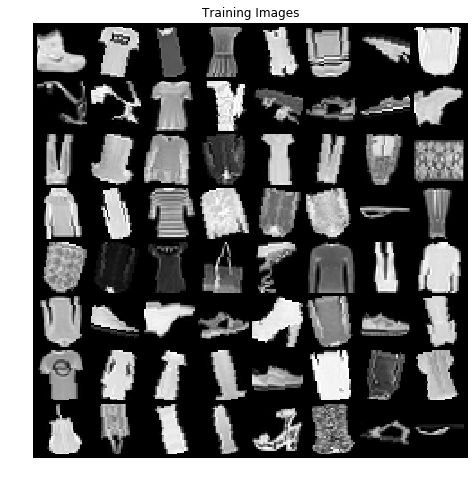

In [7]:
test = trnsfm_batch(images, labels)
show_grid(test)

It's easiest to see if you run it repeatedly and observe how they change. You can also try messing with the parameters of the transformations in the function!